# Understanding Descriptive Statistics

Import the necessary libraries here:

In [12]:
# Libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [13]:
# your code here

def dices(rolls):
       return [random.randint(1,6) for i in range(rolls)]
    

In [14]:
df= pd.DataFrame(dices(10))

In [15]:
df

,0
0,4
1,6
2,3
3,6
4,1
5,2
6,1
7,1
8,1
9,1


#### 2.- Plot the results sorted by value.

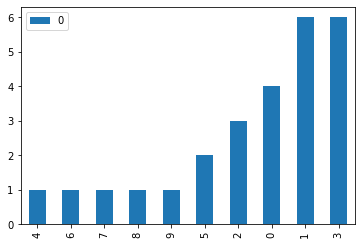

In [16]:
# your code here
df.sort_values(0).plot(kind='bar')

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [17]:
# your code here
sorted_index = df[0].sort_values(0).value_counts().reset_index().sort_values('index')
sorted_index.index = sorted_index['index']
sorted_index.drop('index', axis=1, inplace=True)
sorted_index.columns = ['freq']
sorted_index['freq'].astype(int, copy=False)

index
1    5
2    1
3    1
4    1
6    2
Name: freq, dtype: int64

In [18]:
sorted_index

,freq
index,
1,5
2,1
3,1
4,1
6,2


In [19]:
"""
your comments here: The first dataframe shoes the result of the 10 throws whereas the second dataframe regroups the number of times we get a specific face of the dice in a random sample.
                    
"""

'\nyour comments here: The first dataframe shoes the result of the 10 throws whereas the second dataframe regroups the number of times we get a specific face of the dice in a random sample.\n                    \n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [20]:
# your code here
def mean(x):
    return sum(x)/len(x)

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [21]:
# your code here
mean(sorted_index['freq'])

2.0

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [1]:
# your code here
def median(lst):
    if len(lst) % 2:
        return (sorted(lst)[len(sorted(lst/2))] + sorted(lst)[len(sorted(lst/2) + 1)]


SyntaxError: unexpected EOF while parsing (<ipython-input-1-78aa7e8bc0a6>, line 4)

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [23]:
# your code here


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [24]:
# your code here
df = pd.read_csv('../data/roll_the_dice_hundred.csv')
all(df['Unnamed: 0']== df['roll'])

True

In [25]:
df.drop('Unnamed: 0', axis=1 , inplace=True)

In [26]:
df.head()

,roll,value
0,0,1
1,1,2
2,2,6
3,3,1
4,4,6


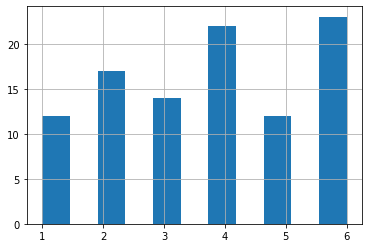

In [64]:
df['value'].hist(bins=11)

In [28]:
"""
your comments here
"""

'\nyour comments here\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [29]:
# your code here
mean(df['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [30]:
# your code here
frequency = df['value'].value_counts()
frequency

6    23
4    22
2    17
3    14
5    12
1    12
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

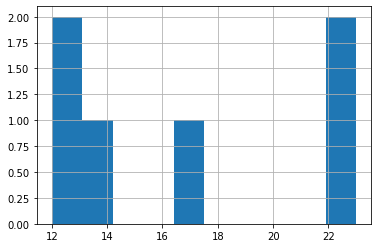

In [38]:
# your code here
df['value'].value_counts().hist(bins=10)

In [32]:
"""
your comments here
"""

'\nyour comments here\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [41]:
# your code here
df_1000 = pd.read_csv('../data/roll_the_dice_thousand.csv')
df_1000.head()

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5


In [42]:
frequency = df_1000['value'].value_counts()
frequency

3    175
1    175
4    168
2    167
6    166
5    149
Name: value, dtype: int64

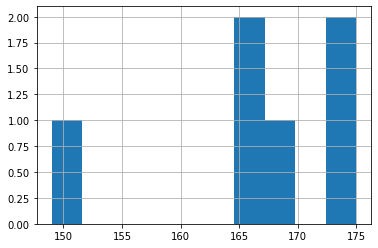

In [43]:
df_1000['value'].value_counts().hist(bins=10)

In [36]:
"""
your comments here
"""

'\nyour comments here\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [44]:
# your code here
age = pd.read_csv('../data/ages_population.csv')
age.head()

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


In [53]:
frequency_age = age['observation'].value_counts()
frequency_age.describe()

count    72.000000
mean     13.888889
std      11.261996
min       1.000000
25%       3.000000
50%      11.500000
75%      23.000000
max      45.000000
Name: observation, dtype: float64

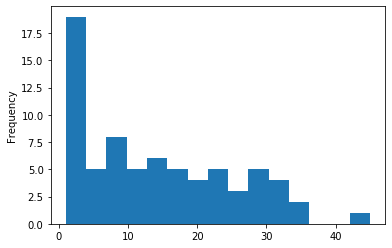

In [51]:
frequency_age.plot.hist(bins=15)

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [52]:
# your code here
frequency_age.mean()

13.88888888888889

In [54]:
frequency_age.std()

11.261995864886467

In [ ]:
"""
your comments here
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [57]:
# your code here
ages_2 = pd.read_csv('../data/ages_population2.csv')
ages_2.head()

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0


In [61]:
frequency_age_2 = ages_2['observation'].value_counts()
frequency_age_2

28.0    139
27.0    125
26.0    120
29.0    115
25.0     98
30.0     90
24.0     78
31.0     61
23.0     41
22.0     35
32.0     31
33.0     22
21.0     17
20.0     13
34.0      7
35.0      3
19.0      3
36.0      2
Name: observation, dtype: int64

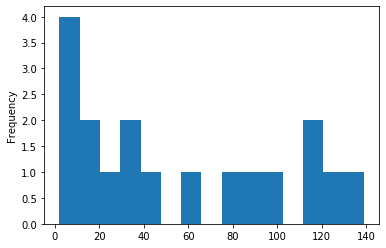

In [62]:
frequency_age_2.plot.hist(bins=15)

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [ ]:
# your code here

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""